# Heart Disease Prediction - Classification Model

## Framework:


### 1. Problem Statement
We are expected to predict whether a patient has heart disease or not.

### 2. Data
The original data came from the Cleveland database from UCI Machine Learning Repository.
Howevever, we've downloaded it in a formatted way from Kaggle.
The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

### 3. Evaluation
If Accuracy reaches above 90% during the proof of concept, we'll pursue the project.

### 4. Features
`Create data dictionary`

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
5. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
6. chol - serum cholestoral in mg/dl
7. serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
8. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
9. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
10. thalach - maximum heart rate achieved
11. exang - exercise induced angina (1 = yes; 0 = no)
12. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will    stress more
13. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
14. ca - number of major vessels (0-3) colored by flourosopy
    colored vessel means the doctor can see the blood passing through
    the more blood movement the better (no clots)
    thal - thalium stress result
    1,3: normal
    6: fixed defect: used to be defect but ok now
    7: reversable defect: no proper blood movement when excercising
15. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Getting Ready

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve

In [2]:
# Importing data
data = pd.read_csv("Data/heart-disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Analyzing Data

In [5]:
data["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

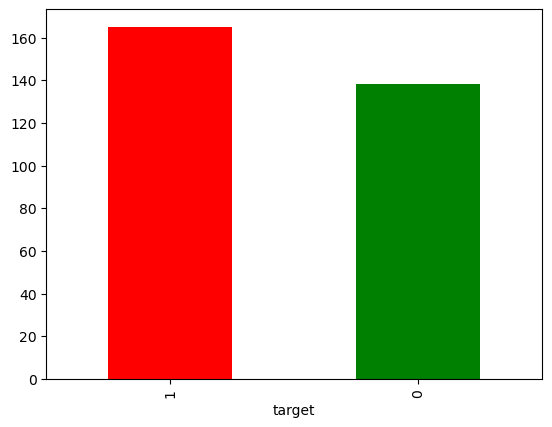

In [7]:
data["target"].value_counts().plot(kind = "bar", color = ["Red", "Green"]);

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Visualizing various Features to gain insights about data

In [14]:
data.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
pd.crosstab(data.target, data.sex)
#  sex -> 0 = Female, 1 = Male

sex,0,1
target,,
0,24,114
1,72,93


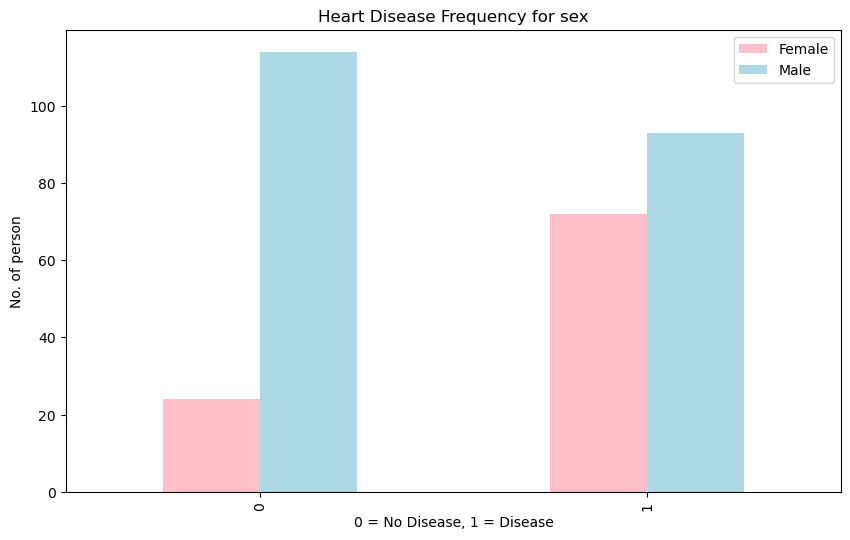

In [17]:
pd.crosstab(data.target, data.sex).plot(kind = "bar",
                                       figsize = (10,6),
                                       color = ["pink", "lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("No. of person")
plt.legend(["Female","Male"])
#plt.xticks(rotation = 1);

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

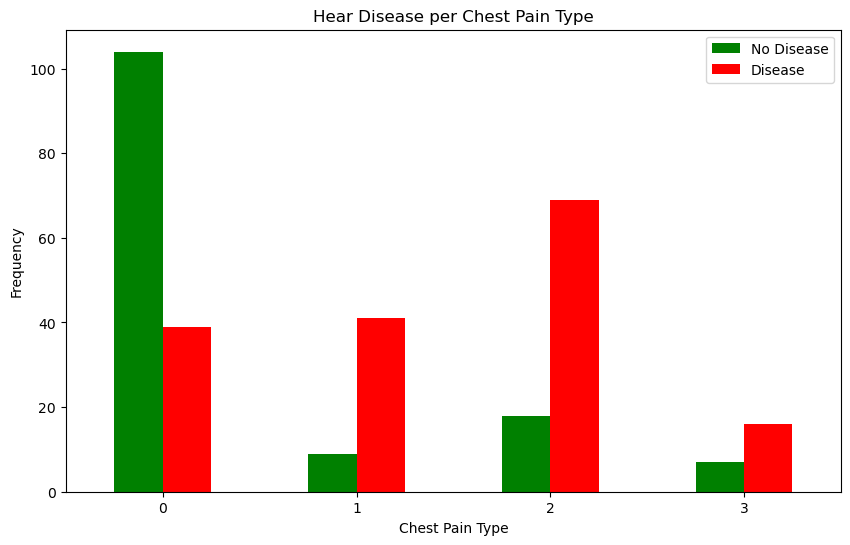

In [20]:
pd.crosstab(data.cp, data.target).plot(kind = "bar", 
                                      figsize = (10,6),
                                      color = ["Green","Red"])
plt.title("Hear Disease per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation = 0)

## Correlation
How different features depend on each other. 
+ve corr -> directly Prop.
-ve corr -> indirectly prop

In [21]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
# Lets understand it using Graph


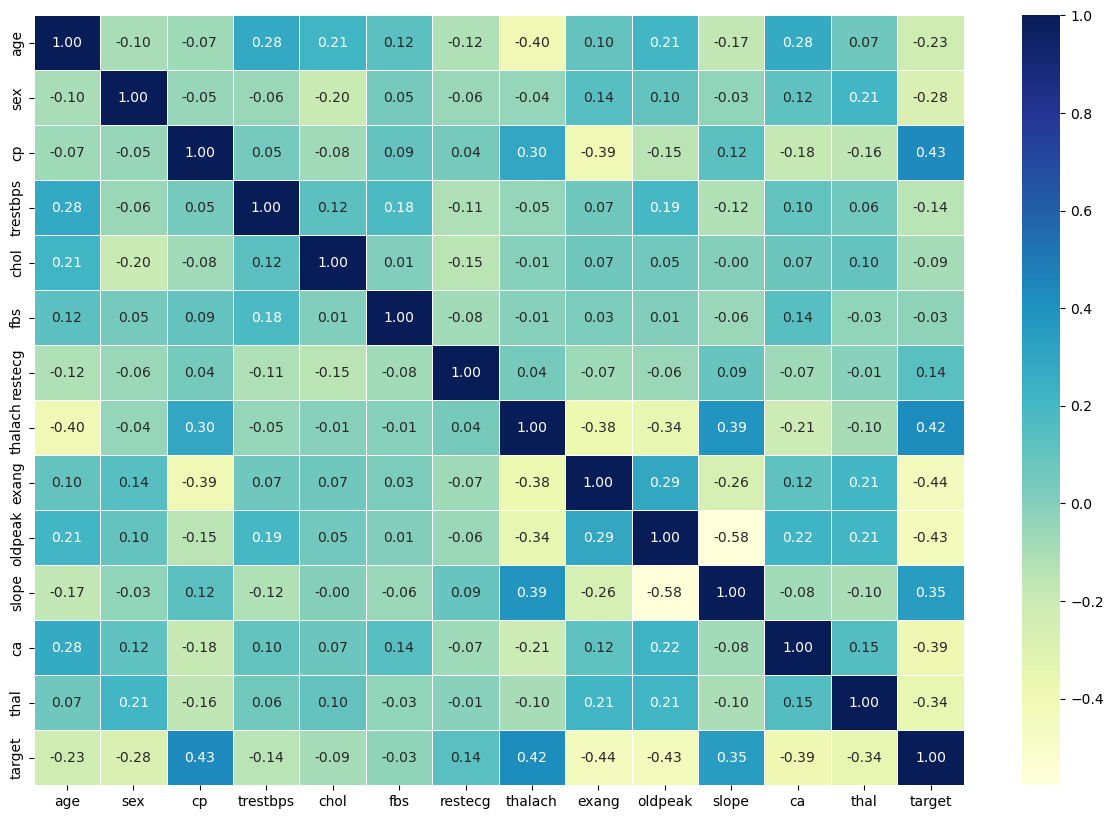

In [22]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths= 0.5,
                fmt= ".2f",
                cmap = "YlGnBu");


* This not necessarily give correct predictions. It just shows how different fields in data are related to each other.

## Modelling

In [3]:
x = data.drop(["target"], axis = 1)
y = data["target"]

In [4]:
np.random.seed(23)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [5]:
# Put models in dict
models = {"Logistic Reg" : LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier(),
         "Gradient Boost" : GradientBoostingClassifier()}

def fitAndScore(models, x_train, x_test, y_train, y_test):
    np.random.seed(23)
    # dict to keep model scores
    model_scores = {}

    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [6]:
model_scores = fitAndScore(models = models,
                         x_train = x_train,
                         x_test = x_test,
                         y_train= y_train,
                         y_test= y_test)

model_scores

C:\DS_Project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Reg': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902,
 'Gradient Boost': 0.8032786885245902}

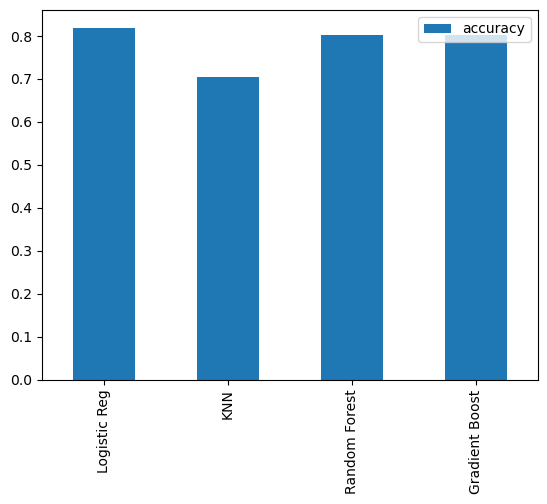

In [7]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

## Hyperparameter Tuning

In [8]:
# For Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# For Random Forest Classifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20 , 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# For GradientBoostingClassifier
gb_grid = {"n_estimators": [100, 200],
        "max_depth": [3, 5],
        "min_samples_split": [2, 5]}

In [9]:
# Tuning LogisticRegression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 3,
                               n_iter = 20,
                               verbose = True)
rs_log_reg.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [10]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [11]:
rs_log_reg.score(x_test, y_test)

0.819672131147541

In [16]:
# For RandomForestClassifier
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions= rf_grid,
                          cv = 3,
                          n_iter = 20,
                          verbose = True)
rs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [17]:
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(7),
 'max_depth': 3}

In [18]:
rs_rf.score(x_test, y_test)

0.819672131147541

In [19]:
# For GradientBoostingClassifier
np.random.seed(42)

gb_rf = RandomizedSearchCV(GradientBoostingClassifier(),
                          param_distributions= gb_grid,
                          cv = 3,
                          n_iter = 20,
                          verbose = True)
gb_rf.fit(x_train, y_train)

C:\DS_Project\env\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]},
                   verbose=True)

In [20]:
gb_rf.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3}

In [21]:
gb_rf.score(x_test, y_test)

0.8032786885245902

At the end, logistic regression is best. So we apply GridSearchCV on it

In [12]:
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
               "solver" : ["liblinear"]}
gs_log_grid = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv = 5,
                          verbose = True)
gs_log_grid.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [13]:
gs_log_grid.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [14]:
gs_log_grid.score(x_test, y_test)

0.819672131147541

## Evaluating the model

In [15]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [16]:
y_preds = gs_log_grid.predict(x_test)

In [17]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [18]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[23  7]
 [ 4 27]]


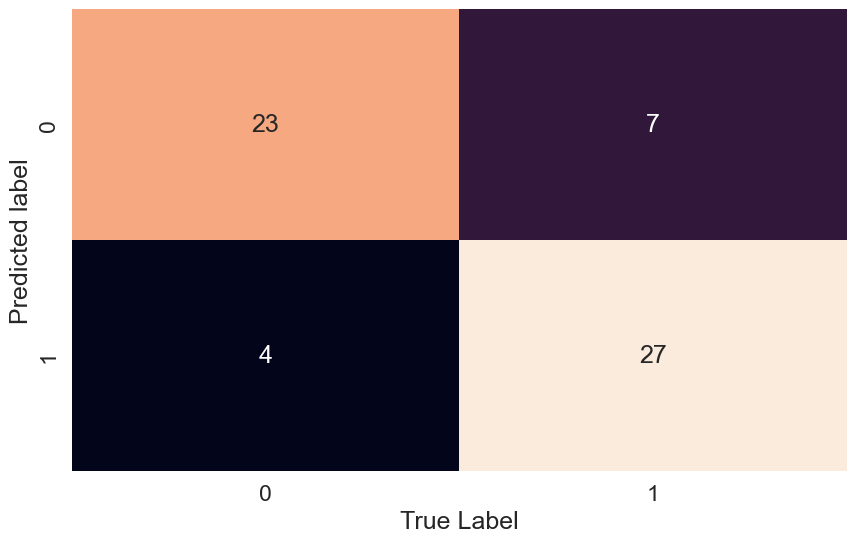

In [19]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize =  (10, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)
     

In [20]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



## Calculate evaluation metrics using cross-validation

In [21]:
gs_log_grid.best_params_

{'C': np.float64(1.3738237958832638), 'solver': 'liblinear'}

In [30]:
clf = LogisticRegression(C = 1.3738237958832638,
                        solver = "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=1.3738237958832638, solver='liblinear')

In [23]:
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "accuracy" )
cv_acc

array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

In [24]:
np.mean(cv_acc)

np.float64(0.8215300546448088)

In [25]:
cv_acc = cross_val_score(clf, x, y, cv = 5, scoring = "precision" )
cv_precision = np.mean(cv_acc)
cv_precision

np.float64(0.817900063251107)

# Saving the Model

In [31]:
import joblib
joblib.dump(clf, "Heart_disease_model.pkl")
print("Tuned model saved as Heart_disease_model.pkl")

Tuned model saved as Heart_disease_model.pkl


# Streamlit Deployment

In [34]:
%%writefile heart.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import sys

# Load trained model
model = joblib.load("Heart_disease_model.pkl")

# Set page configuration
st.set_page_config(page_title="Heart Disease Predictor", layout="centered")

# App Title
st.title("❤️ Heart Disease Prediction App")
st.markdown("Enter the following medical parameters to predict the presence of heart disease.")

# Sidebar Info
with st.sidebar:
    st.header("🩺 About")
    st.write("""
        This app uses a machine learning model to predict the **likelihood of heart disease** 
        based on patient medical attributes.
    """)
    st.write("Developed by **Ashutosh**")

# Input fields
def user_input():
    age = st.slider("Age", 20, 90, 50)
    sex = st.radio("Sex", options=[0, 1], format_func=lambda x: "Female" if x == 0 else "Male")
    cp = st.selectbox("Chest Pain Type (cp)", [0, 1, 2, 3])
    trestbps = st.number_input("Resting Blood Pressure (trestbps)", 80, 200, 120)
    chol = st.number_input("Serum Cholestoral in mg/dl (chol)", 100, 600, 200)
    fbs = st.radio("Fasting Blood Sugar > 120 mg/dl (fbs)", [0, 1])
    restecg = st.selectbox("Resting ECG Results (restecg)", [0, 1, 2])
    thalach = st.number_input("Maximum Heart Rate Achieved (thalach)", 60, 220, 150)
    exang = st.radio("Exercise Induced Angina (exang)", [0, 1])
    oldpeak = st.number_input("ST depression induced by exercise", 0.0, 6.0, 1.0, step=0.1)
    slope = st.selectbox("Slope of the peak exercise ST segment", [0, 1, 2])
    ca = st.selectbox("Number of major vessels (0–3)", [0, 1, 2, 3])
    thal = st.selectbox("Thalassemia (thal)", [0, 1, 2])  # or adjust if encoded differently

    data = {
        'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol,
        'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang,
        'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal
    }
    return pd.DataFrame([data])

# Predict
input_df = user_input()

if st.button("🔍 Predict"):
    prediction = model.predict(input_df)[0]
    pred_proba = model.predict_proba(input_df)[0][prediction]

    if prediction == 1:
        st.error(f"⚠️ High Risk of Heart Disease ({round(pred_proba * 100, 2)}% confidence)")
    else:
        st.success(f"✅ Low Risk of Heart Disease ({round(pred_proba * 100, 2)}% confidence)")

    st.markdown("----")
    st.subheader("🧾 Input Summary")
    st.dataframe(input_df)



Overwriting heart.py
